Apply factor analysis on the dataset (WRA+EPA, 2015-2019, first aquifer) to see if there is any difference comparing to the WRA's yearly factor analysis result.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

In [9]:
path = 'G:\\Shared drives\\科技部水利署計畫_子計畫四'
data_df = pd.read_excel('{}\\data\\wra_2015-2019_data.xlsx'.format(path), sheet_name='delet empty data', index_col=0)
data_df.head()

,ID,WellName,Aquifer,data source,sampling date,CL(mg/L),SO4(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),...,Mn(mg/L),Cd(mg/L),Cr(mg/L),Cu(mg/L),Zn(mg/L),Pb(mg/L),Temp(℃),PH,EC(uS/cm),TOC(mg/L)
no.,,,,,,,,,,,,,,,,,,,,,
1,8060111,新光(1),1,wra,2015-03-24,16.7,3.2,0.01,19.1,13.6,...,0.003,0.0005,0.003,0.0025,0.003,0.003,23.9,5.33,385.0,0.5
2,9020111,溫厝(1),1,wra,2015-03-31,6.8,59.9,0.89,53.0,12.6,...,1.060,0.0005,0.003,0.0025,0.003,0.003,24.1,6.33,501.0,0.7
3,10040111,三和(1),1,wra,2015-03-31,25.5,63.4,0.66,71.0,22.0,...,0.397,0.0005,0.003,0.0060,0.118,0.003,25.7,6.16,630.0,0.5
4,9070311,古坑(1),1,wra,2015-03-31,11.8,43.8,0.01,37.8,16.2,...,0.003,0.0005,0.003,0.0025,0.013,0.003,24.4,5.96,427.0,0.2
5,9070111,東和(1),1,wra,2015-03-31,44.7,337.0,1.44,168.0,101.0,...,0.304,0.0010,0.003,0.0070,0.007,0.003,25.1,6.12,412.0,1.0


In [16]:
data_df.isna().any()

ID               False
WellName         False
Aquifer          False
data source      False
sampling date    False
CL(mg/L)         False
SO4(mg/L)        False
NH3_N(mg/L)      False
Ca(mg/L)         False
Mg(mg/L)         False
K(mg/L)          False
Na(mg/L)         False
Aso              False
Fe(mg/L)         False
Mn(mg/L)         False
Cd(mg/L)         False
Cr(mg/L)         False
Cu(mg/L)         False
Zn(mg/L)         False
Pb(mg/L)         False
Temp(℃)          False
PH               False
EC(uS/cm)        False
TOC(mg/L)        False
dtype: bool

Okay, there is a na in Aso.

In [12]:
data_df.iloc[:, 5:].describe()

,CL(mg/L),SO4(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),K(mg/L),Na(mg/L),Aso,Fe(mg/L),Mn(mg/L),Cd(mg/L),Cr(mg/L),Cu(mg/L),Zn(mg/L),Pb(mg/L),Temp(℃),PH,EC(uS/cm),TOC(mg/L)
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,474.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000
mean,1134.169053,295.764896,1.137253,144.150589,105.133356,27.377472,584.128316,0.023529,12.490356,0.903796,0.000654,0.001844,0.002550,0.025794,0.002028,26.838253,8.416337,3530.456211,1.611221
std,3928.237082,518.528919,2.498764,87.768849,258.106778,74.047568,1942.277240,0.062155,217.410899,5.680651,0.001430,0.002099,0.002833,0.106658,0.009470,1.458142,32.629079,8727.080427,1.140098
min,0.650000,0.850000,0.000000,3.490000,0.734000,0.534000,5.350000,0.000150,0.002500,0.002500,0.000500,0.000500,0.000500,0.001000,0.000150,22.500000,5.290000,131.000000,0.100000
25%,20.450000,58.250000,0.080000,79.300000,20.300000,2.170000,25.100000,0.000700,0.037000,0.132500,0.000500,0.000500,0.000500,0.003000,0.000150,25.700000,6.700000,713.500000,0.700000
50%,34.600000,146.000000,0.340000,131.000000,32.100000,4.850000,37.500000,0.004200,0.521000,0.359000,0.000500,0.000500,0.001000,0.007000,0.000150,26.800000,6.900000,1040.000000,1.400000
75%,71.400000,290.500000,1.240000,189.500000,59.950000,13.800000,77.250000,0.017075,3.650000,0.899500,0.000500,0.003000,0.003000,0.011000,0.002500,27.900000,7.140000,1550.000000,2.350000
max,40300.000000,7360.000000,29.900000,657.000000,2980.000000,785.000000,16400.000000,0.640000,4740.000000,123.000000,0.030000,0.008000,0.017000,0.973000,0.198000,31.100000,718.000000,48600.000000,8.500000


In [3]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(data_df.iloc[:, 5:])
fa = FactorAnalysis()
fa.fit(X_std)

FactorAnalysis()

In [23]:
fa_df = pd.DataFrame(fa.components_[:3], index=['F1', 'F2', 'F3'], columns=data_df.columns[5:])
fa_df

,CL(mg/L),SO4(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),K(mg/L),Na(mg/L),Aso,Fe(mg/L),Mn(mg/L),Cd(mg/L),Cr(mg/L),Cu(mg/L),Zn(mg/L),Pb(mg/L),Temp(℃),PH,EC(uS/cm),TOC(mg/L)
F1,0.964335,0.891473,0.301499,0.579492,0.971247,0.962118,0.964741,0.035772,0.151946,0.161450,-0.025382,-0.080938,-0.016625,0.003380,0.120605,0.077854,-0.002594,0.806355,-0.067050
F2,0.104061,-0.162158,0.107746,-0.135171,-0.054830,-0.058191,-0.043529,0.044636,0.904376,0.889227,0.046677,0.233395,0.179648,0.488268,0.928569,-0.058785,0.003350,-0.141913,-0.131743
F3,-0.026837,-0.006402,-0.282797,0.222071,-0.026426,-0.023214,-0.018765,-0.421658,0.179389,0.215982,-0.283394,-0.798411,-0.783990,-0.066912,-0.016695,0.411616,-0.049556,0.031247,0.442774


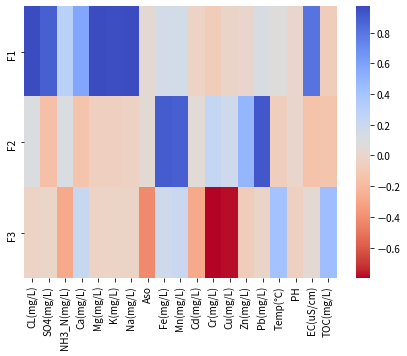

In [28]:
plt.figure(figsize=(7, 5))
sns.heatmap(fa_df, cmap='coolwarm_r')
plt.savefig('{}\\results\\2015-2019_FA_loading_{}.png'.format(path, date))

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_std)

PCA()

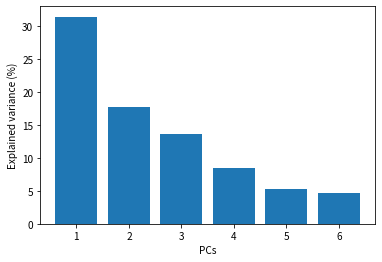

In [10]:
plt.bar(range(1, 7), pca.explained_variance_ratio_[:6]*100)
plt.xlabel('PCs')
plt.ylabel('Explained variance (%)')
plt.savefig('{}\\results\\2015-2019_PCA_variance_{}.png'.format(path, date))

In [12]:
pc_df = pd.DataFrame(pca.components_[:3], index=['PC{}'.format(_) for _ in range(1, 4)], columns=data_df.columns[5:])
pc_df

,CL(mg/L),SO4(mg/L),NH3_N(mg/L),Ca(mg/L),Mg(mg/L),K(mg/L),Na(mg/L),Aso,Fe(mg/L),Mn(mg/L),Cd(mg/L),Cr(mg/L),Cu(mg/L),Zn(mg/L),Pb(mg/L),Temp(℃),PH,EC(uS/cm),TOC(mg/L)
PC1,0.398911,0.373427,0.135995,0.263441,0.402778,0.398084,0.399019,0.016972,0.069042,0.073843,-0.012752,-0.047417,-0.014580,0.000024,0.051930,0.047042,0.000297,0.339458,-0.018336
PC2,0.064818,-0.085584,0.116356,-0.120719,-0.021369,-0.023604,-0.016232,0.103901,0.457478,0.441996,0.084505,0.274765,0.240991,0.313154,0.510519,-0.113495,0.012700,-0.076326,-0.159270
PC3,-0.015231,-0.050112,-0.201112,0.104602,-0.046484,-0.044701,-0.039815,-0.315244,0.289939,0.310783,-0.222430,-0.451992,-0.460402,0.094415,0.177628,0.277098,-0.040633,-0.026062,0.273447


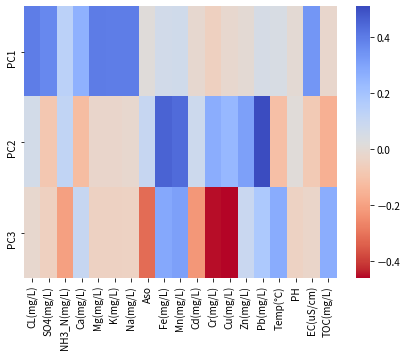

In [16]:
plt.figure(figsize=(7, 5))
sns.heatmap(pc_df, cmap='coolwarm_r')
plt.savefig('{}\\results\\2015-2019_PCA_loading_{}.png'.format(path, date))